In [1]:
import msprime, pyslim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the .trees file
ts = pyslim.load("./decap.trees")    # no simplify!

In [3]:
# Calculate tree heights, giving uncoalesced sites the maximum time
def tree_heights(ts):
    heights = np.zeros(ts.num_trees + 1)
    for tree in ts.trees():
        if tree.num_roots > 1:  # not fully coalesced
            heights[tree.index] = ts.slim_generation
        else:
            children = tree.children(tree.root)
            real_root = tree.root if len(children) > 1 else children[0]
            heights[tree.index] = tree.time(real_root)
    heights[-1] = heights[-2]  # repeat the last entry for plotting with step
    return heights

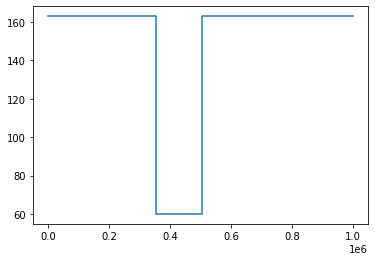

In [4]:
# Plot tree heights before recapitation
breakpoints = list(ts.breakpoints())
heights = tree_heights(ts)
plt.step(breakpoints, heights, where='post')
plt.show()


In [5]:
# Recapitate!
recap = ts.recapitate(recombination_rate=3e-10, Ne=1e5, random_seed=1)
recap.dump("recap.trees")

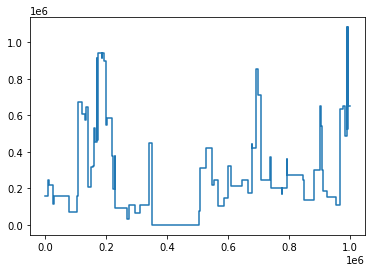

In [6]:
# Plot the tree heights after recapitation
breakpoints = list(recap.breakpoints())
heights = tree_heights(recap)
plt.step(breakpoints, heights, where='post')
plt.show()